# Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
# disable tensorflow log level infos
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # show only errors

import sys
import pandas as pd

if '..' not in sys.path:
    sys.path.insert(0,'..')

In [3]:
from src.base.data_loaders.data_loader import DLName
from src.base.gt_loaders.gt_names import GTName

from src.base.experiment.training.base_models import BaseModel
from src.base.experiment.training.model_creator import Optimizer

from src.base.experiment.dataset.benchmark_dataset import BenchmarkDataset
from src.base.experiment.evaluation.model_evaluator import DataSource, DataPredSelection

from src.exp_runner import ExperimentRunner

from src.m_utils.mtl_approach import MTLApproach

from src.base.experiment.tasks.task import ICAO_REQ
from src.base.experiment.tasks.task import MNIST_TASK
from src.base.experiment.tasks.task import FASHION_MNIST_TASK
from src.base.experiment.tasks.task import CIFAR_10_TASK
from src.base.experiment.tasks.task import CELEB_A_TASK

 ==> Restrict GPU memory growth: True


# Start Network runner

In [4]:
kwargs = { 
    'use_neptune': False,
    'exp_params' : {
        'name': 'train_vgg16_mtl_3_approach',
        'description': 'Training MTL network for MNIST tasks with Handcrafted 3 network architecture',
        'tags': ['mtl', 'handcrafted_3', 'handcrafted_3_exp', 'mnist', 'benchmark', '10 epochs'],
        'src_files': ["../src/**/*.py"]
    },
    'properties': {
        'approach': MTLApproach.HAND_3,
        'benchmarking': {
            'use_benchmark_data': True,
            'benchmark_dataset': BenchmarkDataset.MNIST,
            'tasks': list(MNIST_TASK)
        },
        'icao_data': {
            'icao_gt': {
                'use_gt_data': False,
                'gt_names': {
                    'train_validation': [],
                    'test': [],
                    'train_validation_test': [GTName.FVC]
                },
            },
            'icao_dl': {
                'use_dl_data': False,
                'tagger_model': None
            },
            'reqs': list(ICAO_REQ),
            'aligned': False,
        },
        'balance_input_data': False,
        'train_model': True,
        'save_trained_model': False,
        'exec_nas': False,
        'orig_model_experiment_id': '',
        'sample_training_data': False,
        'sample_prop': 1.0
    },
    'net_train_params': {
        'base_model': BaseModel.VGG16,
        'batch_size': 32,
        'n_epochs': 10,
        'early_stopping': 200,
        'learning_rate': 1e-3,
        'optimizer': Optimizer.ADAMAX,
        'dropout': 0.3
    },
    'nas_params': {}
}

runner = ExperimentRunner(**kwargs)

-------------------- Init ExperimentRunner -------------------
---------------------------
Parent Process ID: 92575
Process ID: 92808
---------------------------
-----
Use Neptune:  False
-----
-------------------
Args: 
{'exp_params': {'description': 'Training MTL network for MNIST tasks with '
                               'Handcrafted 3 network architecture',
                'name': 'train_vgg16_mtl_3_approach',
                'src_files': ['../src/**/*.py'],
                'tags': ['mtl',
                         'handcrafted_3',
                         'handcrafted_3_exp',
                         'mnist',
                         'benchmark',
                         '10 epochs']},
 'nas_params': {},
 'net_train_params': {'base_model': <BaseModel.VGG16: {'name': 'vgg16', 'target_size': (224, 224), 'prep_function': <function preprocess_input at 0x7efe6a70b430>}>,
                      'batch_size': 32,
                      'dropout': 0.3,
                      'early_stopping

# Load Data

In [5]:
runner.load_training_data()

-------------------- load training data -------------------
Loading data
TrainData.shape: (48000, 11)
ValidationData.shape: (12000, 11)
TestData.shape: (10000, 11)
Data loaded


In [6]:
runner.data_processor.train_data.head()

,img_name,n_0,n_1,n_2,n_3,n_4,n_5,n_6,n_7,n_8,n_9
0,/home/guilherme/data1/Dropbox/Link to Desktop/...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,/home/guilherme/data1/Dropbox/Link to Desktop/...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/home/guilherme/data1/Dropbox/Link to Desktop/...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/home/guilherme/data1/Dropbox/Link to Desktop/...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,/home/guilherme/data1/Dropbox/Link to Desktop/...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [7]:
train_data = runner.data_processor.train_data

In [9]:
n0 = train_data.n_0.values
n8 = train_data.n_8.values

from sklearn.metrics import normalized_mutual_info_score

array([0., 1., 0., ..., 0., 0., 0.])

# Sampling Training Data

In [6]:
runner.sample_training_data()

-------------------- sample training data -------------------
Not applying subsampling in training data!


# Data Balancing

In [7]:
runner.balance_input_data()

-------------------- balance input data -------------------
Not balancing input_data


# Data Generators

In [8]:
runner.setup_data_generators()

-------------------- setup data generators -------------------
Starting data generators
Found 48000 validated image filenames.
Found 12000 validated image filenames.
Found 10000 validated image filenames.
TOTAL: 70000

Logging class indices
 .. MTL model not logging class indices!

Using benchmarking dataset. Not logging class labels!


# Setup Experiment

In [9]:
runner.setup_experiment()

-------------------- create experiment -------------------
Setup neptune properties and parameters
Properties and parameters setup done!


# Labels Distribution

In [10]:
runner.summary_labels_dist()

-------------------- summary labels dist -------------------
Using benchmark data. Not doing summary_labels_dist()


# Create Model

In [11]:
runner.create_model()

-------------------- create model -------------------
Creating model...
Model created


# Vizualize Model

In [12]:
%%capture
runner.visualize_model(outfile_path=f"figs/handcrafted_mtl_model_3.png")

In [13]:
%%capture
runner.model_summary()

# Training Model

In [14]:
runner.train_model()

-------------------- train model -------------------
Training VGG16 network
 .. Not fine tuning base model...
  .. Total params: 17,014,484
  .. Trainable params: 2,299,796
  .. Non-trainable params: 14,714,688
Epoch 1/10
1500/1500 [==============================] - 404s 263ms/step - loss: 0.0548 - n_0_loss: 0.0439 - n_1_loss: 0.0321 - n_7_loss: 0.0465 - n_4_loss: 0.0465 - n_2_loss: 0.0518 - n_3_loss: 0.0514 - n_5_loss: 0.0545 - n_6_loss: 0.0522 - n_8_loss: 0.0784 - n_9_loss: 0.0902 - n_0_accuracy: 0.9860 - n_1_accuracy: 0.9889 - n_7_accuracy: 0.9852 - n_4_accuracy: 0.9855 - n_2_accuracy: 0.9822 - n_3_accuracy: 0.9839 - n_5_accuracy: 0.9803 - n_6_accuracy: 0.9824 - n_8_accuracy: 0.9741 - n_9_accuracy: 0.9683 - val_loss: 0.0188 - val_n_0_loss: 0.0151 - val_n_1_loss: 0.0084 - val_n_7_loss: 0.0208 - val_n_4_loss: 0.0119 - val_n_2_loss: 0.0175 - val_n_3_loss: 0.0120 - val_n_5_loss: 0.0159 - val_n_6_loss: 0.0400 - val_n_8_loss: 0.0187 - val_n_9_loss: 0.0273 - val_n_0_accuracy: 0.9946 - val_

# Plots

-------------------- draw training history -------------------


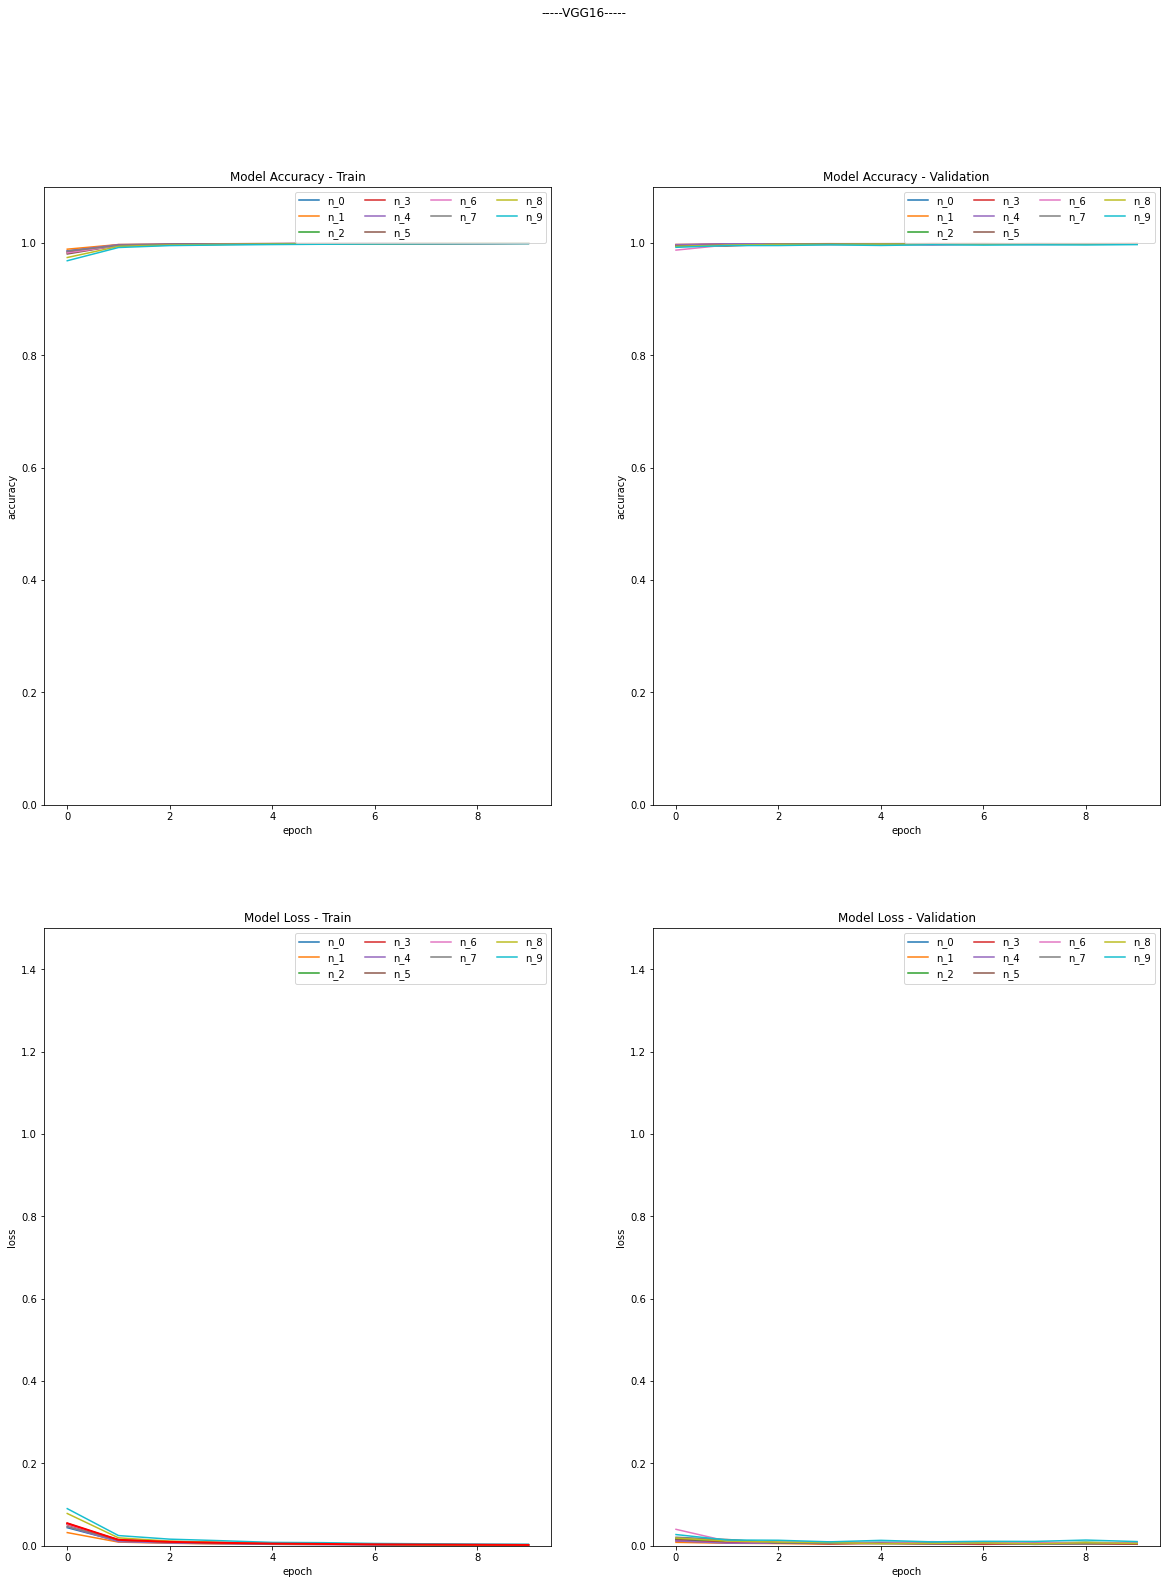

In [15]:
runner.draw_training_history()

# Load Best Model

In [16]:
runner.load_best_model()

-------------------- load best model -------------------
..Loading best model
..Checkpoint weights loaded


# Saving Trained Model

In [17]:
runner.save_model()

-------------------- save model -------------------
Not saving model!


# Test Trained Model

## Validation Split

In [18]:
runner.set_model_evaluator_data_src(DataSource.VALIDATION)
runner.test_model(verbose=False)

Testing Trained Model
Predicting labels....
375/375 [==============================] - 24s 63ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00240 | EER_interp: 0.00250 | ACC: 0.99760
  Task  1: n_1             | EER_mean: 0.00170 | EER_interp: 0.00160 | ACC: 0.99830
  Task  2: n_2             | EER_mean: 0.00220 | EER_interp: 0.00240 | ACC: 0.99780
  Task  3: n_3             | EER_mean: 0.00330 | EER_interp: 0.00240 | ACC: 0.99830
  Task  4: n_4             | EER_mean: 0.00320 | EER_interp: 0.00330 | ACC: 0.99680
  Task  5: n_5             | EER_mean: 0.00170 | EER_interp: 0.00180 | ACC: 0.99820
  Task  6: n_6             | EER_mean: 0.00310 | EER_interp: 0.00320 | ACC: 0.99690
  Task  7: n_7             | EER_mean: 0.00370 | EER_interp: 0.00380 | ACC: 0.99620
  Task  8: n_8             | EER_mean: 0.00340 | EER_interp: 0.00330 | ACC: 0.99680
  Task  9: n_9             | EER_mean: 0.00610 | EER_interp: 0.00600 | ACC: 0.99390
final_EER_mean: 0.3% | final_EER_media

## Test Split

In [19]:
runner.set_model_evaluator_data_src(DataSource.TEST)
runner.test_model(verbose=False)

Testing Trained Model
Predicting labels....
313/313 [==============================] - 22s 69ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00140 | EER_interp: 0.00120 | ACC: 0.99860
  Task  1: n_1             | EER_mean: 0.00170 | EER_interp: 0.00170 | ACC: 0.99830
  Task  2: n_2             | EER_mean: 0.00260 | EER_interp: 0.00280 | ACC: 0.99740
  Task  3: n_3             | EER_mean: 0.00110 | EER_interp: 0.00110 | ACC: 0.99890
  Task  4: n_4             | EER_mean: 0.00110 | EER_interp: 0.00110 | ACC: 0.99890
  Task  5: n_5             | EER_mean: 0.00220 | EER_interp: 0.00180 | ACC: 0.99840
  Task  6: n_6             | EER_mean: 0.00520 | EER_interp: 0.00490 | ACC: 0.99530
  Task  7: n_7             | EER_mean: 0.00390 | EER_interp: 0.00350 | ACC: 0.99680
  Task  8: n_8             | EER_mean: 0.00310 | EER_interp: 0.00280 | ACC: 0.99750
  Task  9: n_9             | EER_mean: 0.00370 | EER_interp: 0.00380 | ACC: 0.99630
final_EER_mean: 0.25% | final_EER_medi

# Visualize Model Classification

# Finishing Experiment Manager

In [20]:
runner.finish_experiment()

-------------------- finish experiment -------------------
Finishing Neptune
Shutting down background jobs, please wait a moment...
Done!
Waiting for the remaining 41 operations to synchronize with Neptune. Do not kill this process.
All 41 operations synced, thanks for waiting!
Explore the metadata in the Neptune app:
https://app.neptune.ai/guilhermemg/icao-nets-training-2/e/ICAO-360
